# Camera Vandalism  

## The concept

Camera vandalism detection is concerned with finding out if some kind of sabotage is done to a camera setup. 

In [1]:
from IPython.display import Image
from IPython.core.display import HTML, display

In [2]:
display(HTML("<table><tr><td><img src='coverage.jpg' width=400px></td><td><img src='disconnection.jpg' width=400px></td></tr></table>"))

,


## Conceptual categorization
On high-level, there could be the following categorization of the cases that can be checked:


### Engineering cases
* These cases checks for video feed avalibility and integrity.
* Works for RTSP(.mkv, .webm, .mpg), Video files(.mp4, .avi), and Web cameras(channels:0/1/2)

### Intelligence cases
* Cases dealt here give actionable insights thus help in intelligent decision making.

## API description with workflow

### 1. Imports

In [2]:
from camera_vandalism import CameraVandalism

## Engineering cases

### 2.a. Instantiate object with RTSP url

In [4]:
obj = CameraVandalism('rtsp://192.168.1.4:8554/demoVideo.mpg')

== Using RTSP feed ==

***Initialization Complete!***



### 2.a.(i) Connection Refused/Not found check

In [ ]:
obj.check_camera_vandalism()

rtsp://192.168.1.4:8554/demoVideo.mpg

Error-1: Connection refused at time: 2018_02_01_19_08_17

Error-1: Connection refused at time: 2018_02_01_19_08_19

Error-1: Connection refused at time: 2018_02_01_19_08_21


### 2.a.(ii) Connection set but feed not available check

In [ ]:
obj.check_camera_vandalism()

rtsp://192.168.1.4:8554/demoVideo.mpg

Error-2: Camera connected but video feed not available. at time: 2018_02_01_19_08_58

Error-2: Camera connected but video feed not available. at time: 2018_02_01_19_09_00

Error-2: Camera connected but video feed not available. at time: 2018_02_01_19_09_02


### 2.a.(iii) Connection set, feed available but incorrupt frames present check

In [ ]:
obj.check_camera_vandalism()

rtsp://192.168.1.4:8554/demoVideo.mpg

Error-3: Camera connected but incoming images are invalid. at time: 2018_02_01_19_09_43

Error-3: Camera connected but incoming images are invalid. at time: 2018_02_01_19_09_45

Error-3: Camera connected but incoming images are invalid. at time: 2018_02_01_19_09_47


## Intelligence Cases

The intelligent cases follow after the integrity of the video frames have been taken care of. The idea here is to algorithmically analyze each incoming frame for vandalism. 

### The kind of sabotage that we could encounter here could be:

**Camera blockage/obstruction:**

The kind of sabotage that we could encounter here could be:
Camera blockage/obstruction:
* Assume that there is a camera network setup at a sensitive location and some of the cameras here have been sabotaged by inducing some obstruction. Since a given camera has a limited field of view, a simple object could easily block the camera. 
* In general, a human operator is always required to check for such anomalies. 
* Our algorithm takes a novel approach by utilizing gradient information in each frame and raises an alert when the camera is found to be blocked. 


### Intelligence cases - start to end
* No Vandalism
* Vandalism started
* Vandalism started but not removed
* Vandalism removed

In [6]:
display(HTML("<table><tr><td><img src='no-vandalism.png' width=400px></td><td><img src='vandalism-started.png' width=400px></td></tr> <tr><td><img src='vandalism-started-but-not-removed.png' width=400px></td><td><img src='vandalism-removed.png' width=400px></td></tr> </table>"))

,
,


### Configurable parameters

* **-input_video** : path of input video

* **-channel** : video channel(0,1,2)

* **size_short_pool** : small the pool size faster the detection is, but small size of pool will give more false results as well
* **n_jobs** : number of parallel jobs to be used
* **plot** : tracking progress plot
* **file_name** : prefix of all internal files to be stored(IMPORTANT : for historical data if file is available then it will be used directly )
* **thresh_shift_param** : numerical parameter to shift threshold, its a multiplicative param, which stretch threshold 
* **eps_frames** : eps_frame number of frame that should be considered to decide fix threshold 
* **frame_to_start** : frame at which prediction should be started (as in video prediction, a lot of time can be for non-vandalised period )

### 2.b. Instantiate object with video file

In [3]:
obj = CameraVandalism('/home/anuj/Desktop/inside_office.avi')

== Using locally stored video file ==

***Initialization Complete!***



0.001727402652990509
reducing pool size 
(0.00025847773308450934, 0.0010000570743136283, -0.0035517471936074396, 0.00348969473121611)
no vandalism


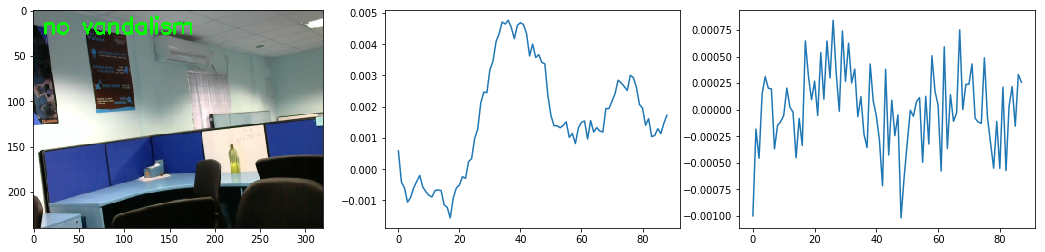

In [10]:
obj.test_on_video('/home/anuj/Desktop/inside_office.avi',n_jobs=1,plot=True)

### 2.c. Instantiate object with web camera

In [2]:
obj = CameraVandalism(1)

NameError: name 'CameraVandalism' is not defined

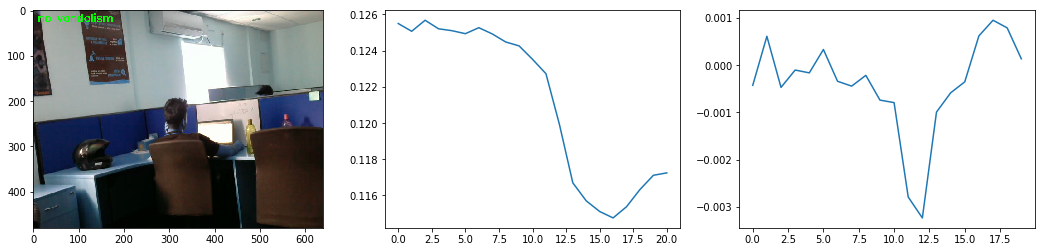

In [4]:
obj.check_camera_vandalism()